# 4.1 Classifying movie reviews: A binary classification example

Two-class classification(Binary classification) 은 기계 학습에서 다루는 가장 일반적인 문제이다. 이 예제에서는 영화 리뷰를 긍정 또는 부정으로 분류하는 방법을 배운다.

## 4.1.1. The IMDB dataset

예제에서는 IMDB 데이터 세트를 사용해서 작업한다. IMDB 데이터 세트는 50,000개의 긍정/부정으로 구분되어 있는 리뷰 모음이다. 데이터는 25,000개의 학습 데이터와 25,000개의 검증 데이터로 나누어져 있다. 각 데이터 모둠은 50% 긍정과 50% 부정 리뷰로 구성되어 있다

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
# print(train_data[0])
# print(train_labels[0])
print(type(train_data))
print(train_data.shape)
print(len(train_data[0]), len(train_data[1]))

<class 'numpy.ndarray'>
(25000,)
218 189


In [3]:
max([max(sequence) for sequence in train_data])

9999

**Decoding review back to text**

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## 4.1.2 Preparing the data

입력 데이터를 두 가지 방법으로 tensor로 변환해서 모델에 입력으로 사용한다.

 - 입력 데이터의 길이가 다르기 때문에 임의로 최대 크기로 지정한 후 최대 크기보다 작은 데이터는 최대 크기의 데이터로 맞춘다.
 - 입력 데이터를 (num_samples, max_length) 의 형태로 변환한다.
 - 변환한 입력 데이터를 네트워크(모델)에 입력으로 사용하는데, 이 경우 입력 데이터 값이 정수(예제의 경우)이기 때문에 정수 값을 그대로 사용하는 것이 아니라 데이터 변환 레이어(Embedding layer)를 네트워크의 앞에 두어 사용한다.
 
 - 다른 방법은 Multi-hot encode(one-hot embedding) 이다. 예제에서는 입력 데이터의 크기를 10,000으로 제한 했다. 따라서 10000차원의 벡터로 생각하고 실제 데이터가 있는 부분(단어가 있는 인덱스)은 1로 아닌 부분은 0으로 값이 채워진 벡터이다.
 - Dense layer에 입력으로 사용한다.

**Encoding the integer sequences via multi-hot encoding**

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
print(x_train[0], len(x_train[0]))

[0. 1. 1. ... 0. 0. 0.] 10000


In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test =np.asarray(test_labels).astype("float32")

## 4.1.3 Building your model

입력 데이터로 벡터와 스칼라(label)로 구성하는 것이 가장 단순하게 문제를 정의하는 방법이다. 모델을 구성할 때 단순한 네트워크(몇 개의 레이러를 쌓아서 연결하는 구조)와 relu 활성함수를 사용하는 것이다.

네트워크를 구성할 때 결정해야 하는 중요한 요소 두 가지
- 얼마나 많은 레이어로 구성할 것인가?
- 각 레이어에 노드는 얼마나 많이 구성할 것인가?

이 예제에서는
- 두 개의 히든 레이어를 사용할 예정이다.
- 각 레이어는 16개의 노드(units)으로 구성한다.

**Model definition**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2022-01-15 15:08:38.738109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 15:08:38.738781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 15:08:38.743846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 15:08:38.744523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 15:08:38.745138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

**TODO**
relu, sigmoid 활성화 함수에 대한 개형과 의미 설명 주가

In [9]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## 4.1.4 Validating your approach

**Setting aside a validation set**

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
print(partial_x_train.shape)
print(x_val.shape)
print(y_val.shape)

(15000, 10000)
(10000, 10000)
(10000,)


**Training  you model**

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/4
118/118 [==============================] - 1s 8ms/step - loss: 4.9966e-09 - accuracy: 1.0000 - val_loss: 2.6179 - val_accuracy: 0.8533
Epoch 2/4
118/118 [==============================] - 1s 5ms/step - loss: 4.1983e-09 - accuracy: 1.0000 - val_loss: 2.6439 - val_accuracy: 0.8535
Epoch 3/4
118/118 [==============================] - 1s 5ms/step - loss: 3.6034e-09 - accuracy: 1.0000 - val_loss: 2.6664 - val_accuracy: 0.8537
Epoch 4/4
118/118 [==============================] - 1s 5ms/step - loss: 3.1820e-09 - accuracy: 1.0000 - val_loss: 2.6847 - val_accuracy: 0.8537


In [19]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.8043 - accuracy: 0.8626


[0.8042982220649719, 0.8626000285148621]

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

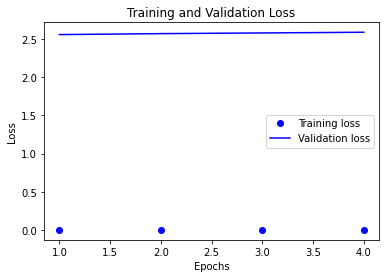

In [28]:
# TODO 학습이 왜 안되는지 원인 파악

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

# 4.2 Classifying newswires: A multiclass classification example

이전 예제에서는 입력 벡터를 두 가지 범주로 분류하는 문제를 다루었다. 하지만 두 가지 이상 범주로 분류해야 하는 경우는 어떻게 해야 할까?

이번 예제는 Reuters newswires를 46개의 주제로 분류하는 모델을 만들어 본다. 이번 예제는 multiclass classification 문제의 구체적인 예제이며 구체적으로는 single-label multicalss classification 문제라고 한다.

## 4.2.1 The Reuters dataset

1986년에 출간된 뉴스와 주제를 모아 놓은 Reuters dataset으로 문제를 해결해 본다. text classification 문제에서 많이 사용하는 데이터이다. 46개의 주제로 구성되어 있다.

**Loading the Reuters dataset**

In [30]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


IMDB 데이터와 마찬가지로 `num_words=10000`은 데이터 출현하는 단어 중 빈도수가 높은 것 순서로 10000개로 제한한다.

In [31]:
print(len(train_data), len(test_data))

8982 2246


In [33]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


IMDB 데이터와 마찬가지로 각 데이터는 정수 리스트이다.

**Decoding newswires back to text**

In [34]:
word_index = reuters.get_word_index()
reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print(decoded_newswire)

565248/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


train_labels를 확인해 보면 0-45 사이의 값임을 확인할 수 있다.

In [35]:
train_labels[0]

3

## 4.2.2 Preparing the data

**Encoding the input data**

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [38]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [39]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## 4.2.3 Building your model

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [41]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 4.2.4 Validating your approach

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 2.5897 - accuracy: 0.5395 - val_loss: 1.6854 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.4009 - accuracy: 0.7151 - val_loss: 1.3042 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.0471 - accuracy: 0.7818 - val_loss: 1.1809 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8306 - accuracy: 0.8239 - val_loss: 1.0453 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6598 - accuracy: 0.8611 - val_loss: 0.9861 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5291 - accuracy: 0.8929 - val_loss: 0.9439 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4220 - accuracy: 0.9131 - val_loss: 0.9283 - val_accuracy: 0.8060
Epoch 8/20
16/16 [=

**Plotting the training and validation loss**

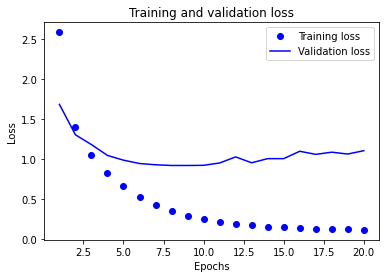

In [44]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()